In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [6]:
x = df[['Age', 'Income($)']]
x.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [13]:
from sklearn.cluster import KMeans

In [14]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, random_state= 10)
    kmeans.fit(x_scale)
    sse.append(kmeans.inertia_)

C:\Users\Samir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Samir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Samir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Samir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

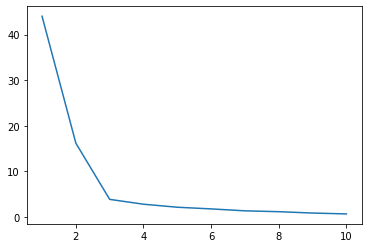

In [15]:
plt.plot(range(1,11), sse)
plt.show()

In [17]:
kmeans = KMeans(n_clusters= 3, random_state= 10)
kmeans.fit(x_scale)
df['cluster'] = kmeans.labels_

C:\Users\Samir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [21]:
features = ['Age', 'Income($)']
segment = df.groupby('cluster')[features].mean()
print(segment)

               Age      Income($)
cluster                          
0        38.285714  150000.000000
1        28.333333   58611.111111
2        40.500000   68666.666667


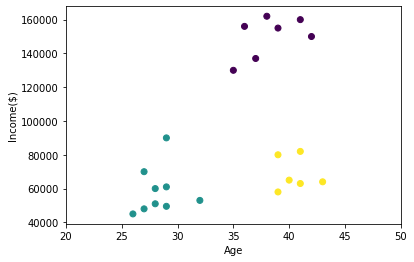

In [27]:
plt.scatter(df['Age'], df['Income($)'], c = df['cluster'])
plt.xlabel('Age')
plt.xlim(20, 50)
plt.ylabel('Income($)')
plt.show()